In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import csv
import time
import random

datos = pd.read_csv("Spectra100.csv", header=None)
X = datos[[0]].values
Y = datos[[1]].values

def gaussian(r, sigma=1):
    """
        Gaussian Function
    """
    return np.exp(- ( r**2 ) / ( 2 * (sigma ** 2)))

In [2]:
class RBF:
    def __init__(self, n_entrada, n_oculta, entradas, respuestas, cluster_size = 30, landa = 0, bias=0):
        self.n_entrada = n_entrada
        self.n_oculta = n_oculta
        self.entradas = entradas
        self.respuestas = respuestas
        self.salida = None
        self.bias = bias 
        
        self.cluster_size = cluster_size
        
        # Calculamos los cluster
        kmeans = KMeans(n_clusters=self.cluster_size, random_state=0).fit(datos.values)
        Xkmean = pd.DataFrame(kmeans.cluster_centers_)[[0]].values
        Ykmean = pd.DataFrame(kmeans.cluster_centers_)[[1]].values
        
        self.Xkmean = Xkmean
        # Calculamos Sigma
        dmax = 0
        for i in Xkmean:
            for j in Xkmean:
                dmax = max(abs(i - j), dmax);

        sigma = dmax / cluster_size;
        self.sigma = sigma
        # Construir la matriz G
        G = np.zeros((n_entrada,cluster_size))
        for i in range(n_entrada):
            for j in range(cluster_size):
                G[i][j] = gaussian(entradas[i] - Xkmean[j], sigma)
                
        # Contruir la matriz G0
        G0 = np.zeros((cluster_size,cluster_size))
        for i in range(cluster_size):
            for j in range(cluster_size):
                G0[i][j] = gaussian(Xkmean[i] - Xkmean[j], sigma)
        
        
        aux = np.matmul(G.T, G) + landa * G0
        
        inversa = np.linalg.inv(aux)
        self.pesos = np.matmul(inversa, np.matmul(G.T, respuestas)) 
        
        
    def calcular(self, x):
        F = 0
        # Calculamos los phi de cada neurona de la capa oculta
        # multiplicado por lo pesos previamente encontrados
        for i in range(self.cluster_size):
            F += self.pesos[i] * gaussian(x - self.Xkmean[i], self.sigma)
            
        F += self.bias
        return F
    

In [3]:
def verificar(rbf):
    error = 0
    y_salida= []
    for x in range(X.shape[0]):
        y = rbf.calcular(X[x])
        y_salida.append(y)
        err = Y[x] - y
        error += err ** 2
        
    error /= 2
    
    print("Error: ", error)
    
    plt.plot(X,Y,'ro', X, y_salida, 'b-')
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.legend(["Puntos Dados", "Puntos Obtenidos"])
    plt.show()

Error:  [0.0354202]


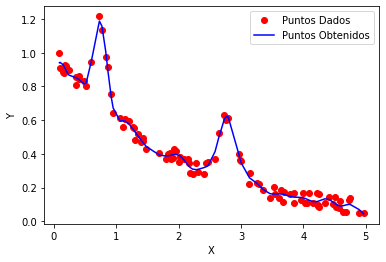

In [4]:
# Cluster 30 - Lambda 0
rbf = RBF(100,100,X,Y,30,0)
verificar(rbf)

Error:  [0.04328763]


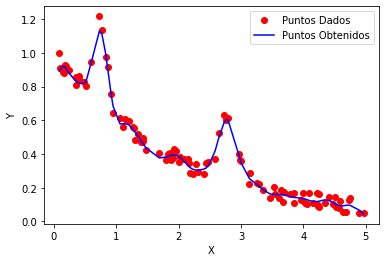

In [5]:
# Cluster 30 - Lambda 0.1
rbf = RBF(100,100,X,Y,30,0.1)
verificar(rbf)

Error:  [0.03558775]


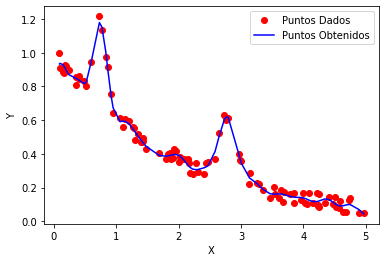

In [6]:
# Cluster 30 - Lambda 0.01
rbf = RBF(100,100,X,Y,30,0.01)
verificar(rbf)

Error:  [0.03542216]


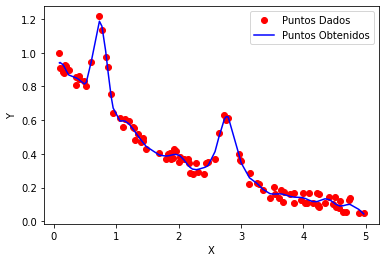

In [7]:
# Cluster 30 - Lambda 0.001
rbf = RBF(100,100,X,Y,30,0.001)
verificar(rbf)

Error:  [0.05641344]


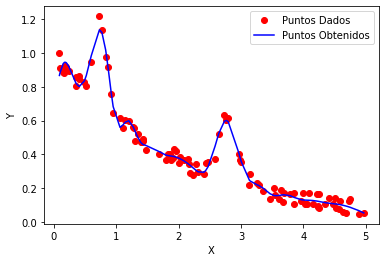

In [8]:
# Cluster 25 - Lambda 0.01
rbf = RBF(100,100,X,Y,25,0.01)
verificar(rbf)

Error:  [0.027742]


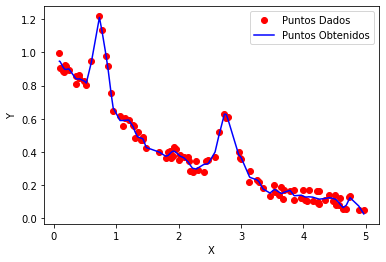

In [9]:
# Cluster 50 - Lambda 0.01
rbf = RBF(100,100,X,Y,50,0.01)
verificar(rbf)

Error:  [0.02665857]


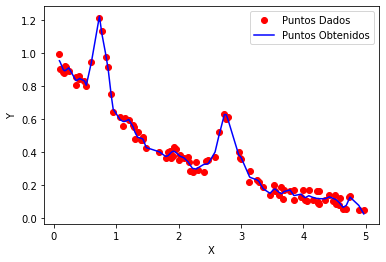

In [10]:
# Cluster 50 - Lambda 0.001
rbf = RBF(100,100,X,Y,50,0.001)
verificar(rbf)

Error:  [0.02333923]


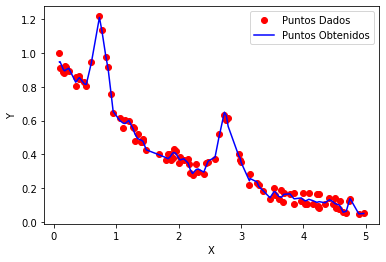

In [11]:
# Cluster 60 - Lambda 0.01
rbf = RBF(100,100,X,Y,60,0.01)
verificar(rbf)

Error:  [0.00713567]


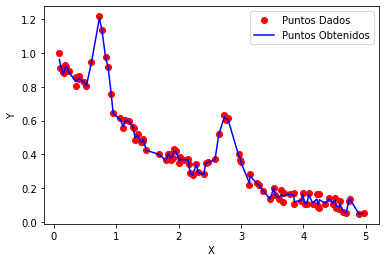

In [12]:
# Cluster 100 - Lambda 0.01
rbf = RBF(100,100,X,Y,100,0.01)
verificar(rbf)

#### Conclusiones

Probando con un aproximadamente un tamaño de clusters de un tercio de la cantidad de datos vemos que da un buen resultado, una buena aproximacion. Cuando aumentamos Lambda a 0.1 parece que error medio aumenta, un poco, no muy fuerte el cambio, ahora, cuando bajamos Lambda a 0.01 si obtenemos mejores resultados, no mejores que siendo igualado a 0, pero bastante parecida la aproximacion.

Bajando la cantidad de clusters vemos que el error aumenta considerablemente con respeto a la prueba anterior.

Probando subiendo la cantidad de cluster tenemos mejores resultados, aumentamos a 50% de la cantidad de datos. Vemos que el error bajo un 30% aproximadamente, sin embargo empezamos a ver un poco de sobreentrenamiento.

Finalmente como era de esperarse si seguimos aumentando la cantidad de clusters tenemos un error muy bajo, casi tendiendo a 0, pero una aproximacion que no favorece por lo sobreentrenada que esta.